# EP2: CUDA & OpenMPI

## Entrega do EP2

Preencha o nome dos 5 membros do seu grupo na tabela abaixo:

| Nome | NUSP |
|------|------|
| André Akira Hayashi | 9293011 |
| Mateus Agostinho dos Anjos | 9298191 |
| Renan Tiago dos Santos Silva | 9793606 |
| Rodrigo Toscano Ney | 11361219 |
| Bruno Picoli Romano | 6402851 |

In [66]:
] up

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


   Updating `~/.julia/environments/v1.4/Project.toml`
  [8314cec4] ↑ PGFPlotsX v1.2.6 ⇒ v1.2.8
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [8314cec4] ↑ PGFPlotsX v1.2.6 ⇒ v1.2.8


In [67]:
import Pkg;
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add(Pkg.PackageSpec(;name="PGFPlotsX", version="1.2.6"))
Pkg.build("PGFPlotsX")
Pkg.add("Plots")
Pkg.add("Query")
Pkg.add("StatsPlots")

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
  [8314cec4] ↓ PGFPlotsX v1.2.8 ⇒ v1.2.6
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [8314cec4] ↓ PGFPlotsX v1.2.8 ⇒ v1.2.6
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
 

In [68]:
] st

Status `~/.julia/environments/v1.4/Project.toml`
  [336ed68f] CSV v0.6.2
  [a93c6f00] DataFrames v0.21.2
  [7073ff75] IJulia v1.21.2
  [8314cec4] PGFPlotsX v1.2.6
  [91a5bcdd] Plots v1.4.3
  [1a8c2f83] Query v0.12.2
  [f3b207a7] StatsPlots v0.14.6


In [69]:
using CSV

function save_csv_results(DataFrame, filename)
    fname = string(filename, ".csv")
    CSV.write(fname, DataFrame)
end
function read_csv_results(filename)
    copy = CSV.read(filename)
    return copy
end

read_csv_results (generic function with 1 method)

## Exercício 1: Apresentação e Análise de Medições para o Programa Sequencial

Os arquivos lidos não continham "," e os **elementos** <em>task-clock</em>, <em>context-switches</em>, <em>cpu-migrations</em>, <em>page-faults</em>, <em>cycles</em>, <em>instuctions</em>, <em>branches</em>, <em>branch-misses</em> e <em>time elpsed</em>, para todos as versões.

Aqui é retirado a informação dos arquivos de log gerado pelo algoritmo sequencial de Mandelbrot, e é colocado em seus respectivos Dataframes. Altera-se os valores de <em>MAX_SIZE</em> e <em>MAX_NUM_THREAD</em> para alterar respectivamente o tamanho da imagem e o número de threads, ambos os valores são na base $2^x$.

Como para as análises abaixo utilizamos as versões com e sem I/O deve executar ambos o arquivos: **mandelbrot_seq** e **mandelbrot_seq_noio**. Ou basta executar o Makefile com o run_measurement.sh, disponível com o arquivo.

In [70]:
using DataFrames, Query, StatsPlots, Statistics
function parse_results_threads(results)
    parsed_results = results |>
                    @groupby(_.threads) |>
                    @map({threads = key(_),
                          mean_time = mean(_.time_elapsed),
                          ci_time = 1.96 * std(_.time_elapsed)}) |>
                    DataFrame
    
    return parsed_results
end

function parse_results_iteration(results)
    parsed_results = results |>
                    @groupby(_.iteration) |>
                    @map({iteration = key(_),
                          mean_time = mean(_.time_elapsed),
                          ci_time = 1.96 * std(_.time_elapsed)}) |>
                    DataFrame
    
    return parsed_results
end

parse_results_iteration (generic function with 1 method)

In [71]:
MAX_SIZE = 8
MAX_NUM_THREAD = 0
s = [x for x in 1:MAX_SIZE]
threads = [2 ^ x for x in 0:MAX_NUM_THREAD]

lines_seq_triple_spiral_noio = read_file("results/mandelbrot_seq_noio/triple_spiral.log")
results_seq_triple_spiral_noio = make_Dataframe(s, threads, lines_seq_triple_spiral_noio)

save_csv_results(results_seq_triple_spiral_noio, "results_seq_triple_spiral_noio")
seq_triple_spiral = read_csv_results("results_seq_triple_spiral_noio.csv")
parsed_threads_seq_triple_spiral = (parse_results_threads(seq_triple_spiral))
parsed_iteration_seq_triple_spiral = (parse_results_iteration(seq_triple_spiral))

,iteration,mean_time,ci_time
,Int64,Float64,Float64
1,1,22.1969,NaN
2,2,22.3583,NaN
3,3,22.1904,NaN
4,4,22.1909,NaN
5,5,22.1964,NaN
6,6,22.1899,NaN
7,7,22.1931,NaN
8,8,22.1983,NaN


In [72]:
MAX_SIZE = 8
MAX_NUM_THREAD = 5
s = [x for x in 1:MAX_SIZE]
threads = [2 ^ x for x in 0:MAX_NUM_THREAD]

lines_pth_triple_spiral_noio = read_file("results/mandelbrot_pth_noio/triple_spiral.log")
results_pth_triple_spiral_noio = make_Dataframe(s, threads, lines_pth_triple_spiral_noio)
save_csv_results(results_pth_triple_spiral_noio, "results_pth_triple_spiral_noio")
pth_triple_spiral = read_csv_results("results_pth_triple_spiral_noio.csv")
parsed_threads_pth_triple_spiral = (parse_results_threads(pth_triple_spiral))
parsed_iteration_pth_triple_spiral = (parse_results_iteration(pth_triple_spiral))

lines_omp_triple_spiral_noio = read_file("results/mandelbrot_omp_noio/triple_spiral.log")
results_omp_triple_spiral_noio = make_Dataframe(s, threads, lines_omp_triple_spiral_noio)
save_csv_results(results_omp_triple_spiral_noio, "results_omp_triple_spiral_noio")
omp_triple_spiral = read_csv_results("results_omp_triple_spiral_noio.csv")
parsed_threads_omp_triple_spiral = (parse_results_threads(omp_triple_spiral))
parsed_iteration_omp_triple_spiral = (parse_results_iteration(omp_triple_spiral))

,iteration,mean_time,ci_time
,Int64,Float64,Float64
1,1,10.2685,12.2909
2,2,10.2721,12.2465
3,3,10.2795,12.2408
4,4,10.2927,12.2121
5,5,10.3164,12.2111
6,6,10.3156,12.177
7,7,10.3254,12.1858
8,8,10.3294,12.1734


In [73]:
using Plots
pgfplotsx()

function plot_results_iteration(x, y, x_label, y_label, series_label; yerror = [], max_size_iteration)      
    if yerror != []
        p = scatter(x,
            y,
            xlabel = x_label,
            ylabel = y_label,
            xticks = [x for x in 1:max_size_iteration],
            yerror = yerror,
            alpha = 0.6,
            labels = series_label,
            legend = :top)
    else
        p = scatter(x,
            y,
            xlabel = x_label,
            ylabel = y_label,
            xticks = [x for x in 1:max_size_iteration],
            alpha = 0.6,
            labels = series_label,
            legend = :top)
    end
    
    return p
end

function plot_results_thread(x, y, x_label, y_label, series_label; yerror = [], max_thread_power = 1)      
    if yerror != []
        p = scatter(x,
            y,
            xaxis = :log2,
            xlabel = x_label,
            ylabel = y_label,
            xticks = [2^x for x in 1:max_thread_power],
            yerror = yerror,
            alpha = 0.6,
            labels = series_label,
            legend = :topright)
    else
        p = scatter(x,
            y,
            xaxis = :log2,
            xlabel = x_label,
            ylabel = y_label,
            xticks = [2^x for x in 1:max_thread_power],
            alpha = 0.6,
            labels = series_label,
            legend = :topright)
    end
    
    return p
end

plot_results_thread (generic function with 1 method)

## Gráficos Sequencial

Os gráficos foram gerados rodando as versões sem I/O, com 15 repetições, tamanho
da imagem igual a 4096, e na região Triple Spiral Valley, além de realizar 8 iterações sobre o mesmo código.

### Tempo x Iterações

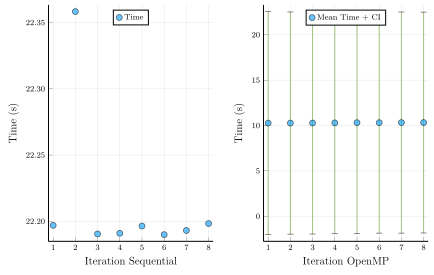

In [74]:
p1 = plot_results_iteration(seq_triple_spiral.iteration,
    seq_triple_spiral.time_elapsed,
    "Iteration Sequential",
    "Time (s)",
    "Time",
    max_size_iteration = 8)
plot(p1, p2)

### Tempo x Threads

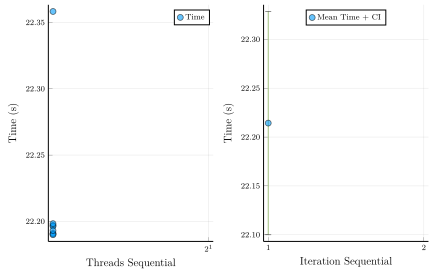

In [75]:
p1 = plot_results_thread(seq_triple_spiral.threads,
    seq_triple_spiral.time_elapsed,
    "Threads Sequential",
    "Time (s)",
    "Time",
    max_thread_power = 1)
p2 = plot_results_iteration(parsed_threads_seq_triple_spiral.threads,
    parsed_threads_seq_triple_spiral.mean_time,
    "Iteration Sequential",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_threads_seq_triple_spiral.ci_time,
    max_size_iteration = 8)
plot(p1, p2)

## Gráficos Pthread

### Tempo x Iterações

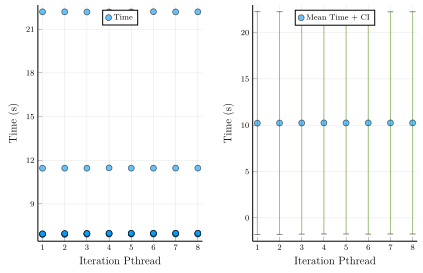

In [76]:
p1 = plot_results_iteration(pth_triple_spiral.iteration,
    pth_triple_spiral.time_elapsed,
    "Iteration Pthread",
    "Time (s)",
    "Time",
    max_size_iteration = 8)
p2 = plot_results_iteration(parsed_iteration_pth_triple_spiral.iteration,
    parsed_iteration_pth_triple_spiral.mean_time,
    "Iteration Pthread",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_iteration_pth_triple_spiral.ci_time,
    max_size_iteration = 8)
plot(p1,p2)

### Tempo x Threads

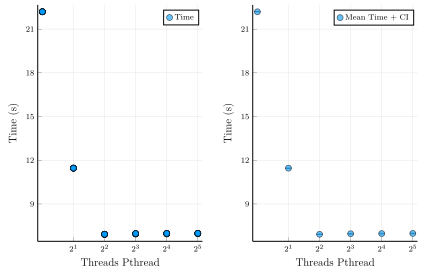

In [77]:
p1 = plot_results_thread(pth_triple_spiral.threads,
    pth_triple_spiral.time_elapsed,
    "Threads Pthread",
    "Time (s)",
    "Time",
    max_thread_power = 5)
p2 = plot_results_thread(parsed_threads_pth_triple_spiral.threads,
    parsed_threads_pth_triple_spiral.mean_time,
    "Threads Pthread",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_threads_pth_triple_spiral.ci_time,
    max_thread_power = 5)
plot(p1,p2)

## Gráficos OpenMP

### Tempo x Iterações

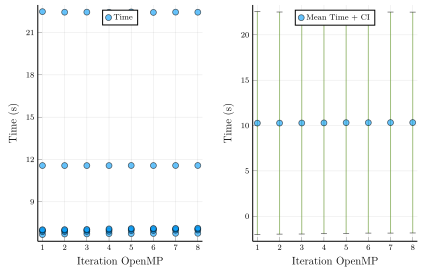

In [78]:
p1 = plot_results_iteration(omp_triple_spiral.iteration,
    omp_triple_spiral.time_elapsed,
    "Iteration OpenMP",
    "Time (s)",
    "Time",
    max_size_iteration = 8)
p2 = plot_results_iteration(parsed_iteration_omp_triple_spiral.iteration,
    parsed_iteration_omp_triple_spiral.mean_time,
    "Iteration OpenMP",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_iteration_omp_triple_spiral.ci_time,
    max_size_iteration = 8)
plot(p1,p2)

### Tempo x Threads

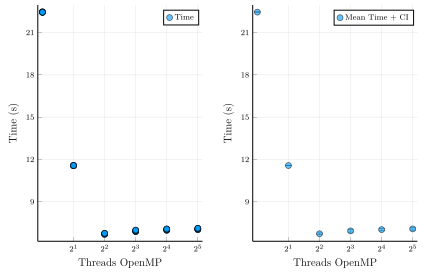

In [79]:
p1 = plot_results_thread(omp_triple_spiral.threads,
    omp_triple_spiral.time_elapsed,
    "Threads OpenMP",
    "Time (s)",
    "Time",
    max_thread_power = 5)
p2 = plot_results_thread(parsed_threads_omp_triple_spiral.threads,
    parsed_threads_omp_triple_spiral.mean_time,
    "Threads OpenMP",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_threads_omp_triple_spiral.ci_time,
    max_thread_power = 5)
plot(p1,p2)

#### Análises